```
[Title] Autoencoder using Tensorflow.Keras
[Author] Yibeck Lee(yibec.Lee@gmail.com)
[Contents]
 - Aucoencoder for Dimension Reduction
[References]
 - https://towardsdatascience.com/pca-vs-autoencoders-1ba08362f450
 - https://medium.com/datadriveninvestor/deep-autoencoder-using-keras-b77cd3e8be95
```

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np

Using TensorFlow backend.


In [16]:
trainFeatures = np.array([
  [1,1,1]
, [1,1,1]
, [1,1,1]
, [1,1,1]
, [1,2,3]  # 다른 데이터와 유사하지 않은 데이터
, [2,2,2]
, [2,2,2]
, [2,2,2]
, [2,2,2]
, [1,3,5]  # 다른 데이터와 유사하지 않은 데이터
])
print(trainFeatures)

[[1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 2 3]
 [2 2 2]
 [2 2 2]
 [2 2 2]
 [2 2 2]
 [1 3 5]]


In [17]:
encoding_dim = 2
input_img = Input(shape=(3,))
encoded = Dense(encoding_dim)(input_img)
decoded = Dense(3)(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='mse')

In [18]:
autoencoder.fit(trainFeatures, trainFeatures,
                epochs=100,
                batch_size=2,
                verbose=0,
                shuffle=True)

In [19]:
decoded_imgs = autoencoder.predict(trainFeatures)

In [20]:
decoded_imgs
# [1.2490183, 1.7521611, 2.2233188] 추측을 잘 못함
# [1.3331378, 2.2447793, 3.158458 ] 추측을 잘 못함

array([[1.1648988, 1.259543 , 1.2881799],
       [1.1648988, 1.259543 , 1.2881799],
       [1.1648988, 1.259543 , 1.2881799],
       [1.1648988, 1.259543 , 1.2881799],
       [1.2490183, 1.7521611, 2.2233188],
       [1.6536717, 2.1080785, 2.476304 ],
       [1.6536717, 2.1080785, 2.476304 ],
       [1.6536717, 2.1080785, 2.476304 ],
       [1.6536717, 2.1080785, 2.476304 ],
       [1.3331378, 2.2447793, 3.158458 ]], dtype=float32)

In [21]:
error = trainFeatures - decoded_imgs # cost

In [22]:
error_square = error**2
error_square

array([[0.0271916 , 0.06736254, 0.08304764],
       [0.0271916 , 0.06736254, 0.08304764],
       [0.0271916 , 0.06736254, 0.08304764],
       [0.0271916 , 0.06736254, 0.08304764],
       [0.06201012, 0.0614241 , 0.60323366],
       [0.11994326, 0.01168096, 0.22686555],
       [0.11994326, 0.01168096, 0.22686555],
       [0.11994326, 0.01168096, 0.22686555],
       [0.11994326, 0.01168096, 0.22686555],
       [0.11098076, 0.57035823, 3.39127696]])

In [23]:
error_square = np.sum(error_square, axis=1)
error_square

array([0.17760178, 0.17760178, 0.17760178, 0.17760178, 0.72666788,
       0.35848977, 0.35848977, 0.35848977, 0.35848977, 4.07261595])

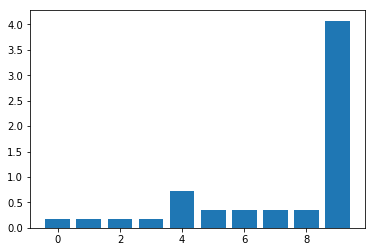

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
ind = np.arange(10) 
plt.bar(ind, error_square)
plt.show()

# 일정 값 이상 값이 큰 것을 기준으로, outlier를 찾을 수 있다.